<a href="https://colab.research.google.com/github/jnsbrdbr/hopefully_last_thesis/blob/main/9921_1000_smote_model%3Aregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer
import collections
from sklearn.model_selection import KFold
from numpy import mean
from sklearn.model_selection import cross_val_score,cross_val_predict
from numpy import std

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with pd.HDFStore('/content/drive/MyDrive/last/last_result_1000',  mode='r') as newstore:
    result = newstore.select('result')

In [4]:
result

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,-1.715972,-3.099936,-0.041249,-3.014462e-14,6.993068e-15,0.077295,1.691428,3.341114,2.942154e-13,-8.283869e-14,...,2.773322e-04,9.491344e-03,-7.804946e-03,-5.670672e-03,2.927722e-03,1.908601e-02,-1.444934e-02,-2.196036e-02,-7.038974e-03,1
1,-1.715972,-3.099936,-0.041249,-1.077147e-13,-7.609726e-15,0.077295,1.691428,3.341114,-1.438132e-14,8.662557e-16,...,-8.023104e-03,-2.400882e-03,-4.764501e-04,3.001035e-03,2.223896e-02,-6.529277e-03,-9.276991e-03,-1.871558e-02,4.280893e-03,1
2,-1.715972,-3.099936,-0.041249,3.613522e-14,-6.634688e-14,0.077295,1.691428,3.341114,1.872817e-13,-2.918520e-14,...,-6.572360e-04,1.802349e-02,-8.207065e-03,8.771168e-03,-4.267901e-03,3.784342e-05,-7.928601e-03,2.407668e-02,1.858991e-03,1
3,-1.715972,-3.099936,-0.041249,-4.985799e-16,-1.950109e-14,0.077295,1.691428,3.341114,1.273288e-13,7.392117e-15,...,1.562232e-02,1.669297e-02,6.232700e-03,-5.914754e-03,-2.125491e-02,5.786478e-03,-1.987696e-02,-1.467211e-02,-1.827221e-02,1
4,-1.715972,-3.099936,-0.041249,3.076934e-14,-2.010380e-14,0.077295,1.691428,3.341114,9.698404e-14,4.389324e-15,...,1.615195e-15,1.979979e-14,-1.314080e-14,-5.936133e-16,-1.114754e-13,2.508360e-14,-1.752908e-14,-6.587185e-15,-6.375053e-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.114893,-4.572474,-0.754679,9.812903e-13,-5.991311e-14,8.797502,-0.661164,-0.063010,-3.763016e-02,1.747494e-02,...,-1.163868e-02,-6.831592e-03,-2.390951e-02,-6.128685e-04,2.083087e-02,6.098501e-03,1.520041e-02,-5.489348e-03,-1.505644e-02,1
996,-2.114893,-4.572474,-0.754679,9.808844e-13,-6.005569e-14,8.797502,-0.661164,-0.063010,1.491368e-02,4.994059e-02,...,3.774208e-03,1.141794e-02,-3.274494e-02,1.119192e-02,-2.678543e-02,-9.823778e-03,1.566019e-02,3.322733e-02,-9.037160e-03,1
997,-2.114893,-4.572474,-0.754679,9.811770e-13,-5.988958e-14,8.797502,-0.661164,-0.063010,-3.931630e-02,-1.973605e-02,...,8.641479e-03,-3.511065e-03,3.228450e-02,-4.198955e-03,1.000159e-03,-4.999201e-02,7.336873e-03,-1.289204e-02,-1.050892e-02,1
998,-2.114893,-4.572474,-0.754679,9.807072e-13,-6.027299e-14,8.797502,-0.661164,-0.063010,1.801955e-02,8.807116e-02,...,-3.519257e-02,1.069808e-02,5.276833e-03,1.659729e-02,3.791869e-02,1.136222e-02,2.956178e-02,1.088086e-02,-1.952860e-03,1


In [5]:
#divide data in to data_label and non_data label

result.rename(columns = {70:'label'}, inplace = True)
y=result.label
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(len(y)):
  if y[i]==1:
    y[i]=0
  else:
    y[i]=1

result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel

In [6]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64


In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-1.715972,-3.099936,-0.041249,-3.014462e-14,6.993068e-15,0.077295,1.691428,3.341114,2.942154e-13,-8.283869e-14,...,-0.111385,2.773322e-04,9.491344e-03,-7.804946e-03,-5.670672e-03,2.927722e-03,1.908601e-02,-1.444934e-02,-2.196036e-02,-7.038974e-03
1,-1.715972,-3.099936,-0.041249,-1.077147e-13,-7.609726e-15,0.077295,1.691428,3.341114,-1.438132e-14,8.662557e-16,...,-0.111385,-8.023104e-03,-2.400882e-03,-4.764501e-04,3.001035e-03,2.223896e-02,-6.529277e-03,-9.276991e-03,-1.871558e-02,4.280893e-03
2,-1.715972,-3.099936,-0.041249,3.613522e-14,-6.634688e-14,0.077295,1.691428,3.341114,1.872817e-13,-2.918520e-14,...,-0.111385,-6.572360e-04,1.802349e-02,-8.207065e-03,8.771168e-03,-4.267901e-03,3.784342e-05,-7.928601e-03,2.407668e-02,1.858991e-03
3,-1.715972,-3.099936,-0.041249,-4.985799e-16,-1.950109e-14,0.077295,1.691428,3.341114,1.273288e-13,7.392117e-15,...,-0.111385,1.562232e-02,1.669297e-02,6.232700e-03,-5.914754e-03,-2.125491e-02,5.786478e-03,-1.987696e-02,-1.467211e-02,-1.827221e-02
4,-1.715972,-3.099936,-0.041249,3.076934e-14,-2.010380e-14,0.077295,1.691428,3.341114,9.698404e-14,4.389324e-15,...,12.371234,1.615195e-15,1.979979e-14,-1.314080e-14,-5.936133e-16,-1.114754e-13,2.508360e-14,-1.752908e-14,-6.587185e-15,-6.375053e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.114893,-4.572474,-0.754679,9.812903e-13,-5.991311e-14,8.797502,-0.661164,-0.063010,-3.763016e-02,1.747494e-02,...,-0.111385,-1.163868e-02,-6.831592e-03,-2.390951e-02,-6.128685e-04,2.083087e-02,6.098501e-03,1.520041e-02,-5.489348e-03,-1.505644e-02
996,-2.114893,-4.572474,-0.754679,9.808844e-13,-6.005569e-14,8.797502,-0.661164,-0.063010,1.491368e-02,4.994059e-02,...,-0.111385,3.774208e-03,1.141794e-02,-3.274494e-02,1.119192e-02,-2.678543e-02,-9.823778e-03,1.566019e-02,3.322733e-02,-9.037160e-03
997,-2.114893,-4.572474,-0.754679,9.811770e-13,-5.988958e-14,8.797502,-0.661164,-0.063010,-3.931630e-02,-1.973605e-02,...,-0.111385,8.641479e-03,-3.511065e-03,3.228450e-02,-4.198955e-03,1.000159e-03,-4.999201e-02,7.336873e-03,-1.289204e-02,-1.050892e-02
998,-2.114893,-4.572474,-0.754679,9.807072e-13,-6.027299e-14,8.797502,-0.661164,-0.063010,1.801955e-02,8.807116e-02,...,-0.111385,-3.519257e-02,1.069808e-02,5.276833e-03,1.659729e-02,3.791869e-02,1.136222e-02,2.956178e-02,1.088086e-02,-1.952860e-03


# **SMOTE**

In [8]:
#numer of fake and real in dataset

print('Number of fake in y:',collections.Counter(y)[0])
print('Number of real in y:',collections.Counter(y)[1])

Number of fake in y: 990
Number of real in y: 10


In [9]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


#skf = StratifiedKFold(n_splits=10,shuffle=True)
kf = KFold(n_splits=10,shuffle=True)
acc_score = list()
res_fpr = list()
res_tpr = list()
res_probas_=list()
Y_test_lst=list()
pred_values_lst=list()

for fold, (train_index, test_index) in enumerate(kf.split(X,y)):#enumerate(

    print(f'For fold {fold}:')
    #splitting data

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index] 
    print('Number of real in y_train:',collections.Counter(y_train)[0])
    print('Number of fake in y_train:',collections.Counter(y_train)[1])
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    print('Number of real in y_test:',collections.Counter(y_test)[0])
    print('Number of fake in y_test:',collections.Counter(y_test)[1])
      


    #smote
    sm = SMOTE(sampling_strategy=0.334)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    print('Number of fake in y_train_oversampled:',collections.Counter(y_train_oversampled)[1])
    print('Number of real in y_train_oversampled:',collections.Counter(y_train_oversampled)[0])

    
    #the model
    model = LogisticRegression(C=0.05,solver='newton-cg',penalty='l2')#,
    model.fit(X_train_oversampled, y_train_oversampled )  

    #predicting with x_test
    y_pred = model.predict(X_test)
    Y_test_lst.append(y_test)
    pred_values_lst.append(y_pred)


    #y_test_arr=np.array(y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    
    print('\n',f'True Positives: {tp}')
    print(f'False Negatives: {fn}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')

    fpr=(np.divide(fp,(fp+tn)))
    if fp==0 :
      fpr=0
    
    tpr=(np.divide(tp,(tp+fn)))
    if tp==0:
      tpr=0
    if collections.Counter(y_test)[1]==0 :
      tpr=1

    y_test_arr=np.array(y_test)
    count=0
    con=0
    for i in range(0,len(y_test_arr)):
       if y_test_arr[i]==1:
          count+=1
       else:
         con+=1

    #printting the acc for every fold
    
    acc=model.score(X_test, y_test)
    print(f'Accuracy: {acc}')
    acc_score.append(acc)
    
    print('\n',"number of real:",con)
    print("number of fake:",count)

    print('\n','fpr=%.3f' % (mean(fpr)))#tpr=%.4f : mean(tpr), 
    res_fpr.append(mean(fpr))
    print()
    print('\n','tpr=%.3f' % (mean(tpr)))#tpr=%.4f : mean(tpr), 
    res_tpr.append(mean(tpr))
    print('------------------')
    i+=1


#printting acc in total
avg_acc_score = np.sum(acc_score)/10
print(f'total Accuracy: {avg_acc_score}')
total_fpr=np.sum(res_fpr)/10
total_tpr=np.sum(res_tpr)/10
print(f'\n\n total_fpr= {total_fpr}')
print(f'\n\n total_tpr= {total_tpr}')

For fold 0:
Number of real in y_train: 892
Number of fake in y_train: 8
Number of real in y_test: 98
Number of fake in y_test: 2
Number of fake in y_train_oversampled: 297
Number of real in y_train_oversampled: 892

 True Positives: 0
False Negatives: 2
False Positives: 0
True Negatives: 98
Accuracy: 0.98

 number of real: 98
number of fake: 2

 fpr=0.000


 tpr=0.000
------------------
For fold 1:
Number of real in y_train: 893
Number of fake in y_train: 7
Number of real in y_test: 97
Number of fake in y_test: 3
Number of fake in y_train_oversampled: 298
Number of real in y_train_oversampled: 893

 True Positives: 0
False Negatives: 3
False Positives: 0
True Negatives: 97
Accuracy: 0.97

 number of real: 97
number of fake: 3

 fpr=0.000


 tpr=0.000
------------------
For fold 2:
Number of real in y_train: 890
Number of fake in y_train: 10
Number of real in y_test: 100
Number of fake in y_test: 0
Number of fake in y_train_oversampled: 297
Number of real in y_train_oversampled: 890

 T

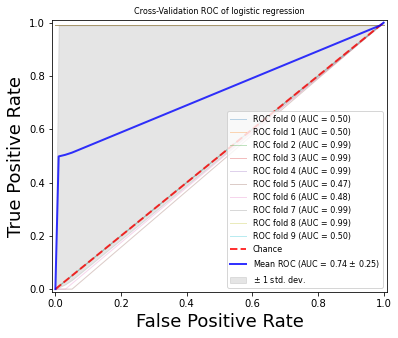

In [10]:
#ROC_AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')


kf = KFold(n_splits=10,shuffle=True)
tprs = []
aucs = []
fpr_lst=list()
tpr_lst=list()
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(6,5))
i = 0
for _ , _ in kf.split(X,y):
    # Compute ROC curve and area the curve
    #fpr, tpr, thresholds = roc_curve(Y_test_lst[i],res_probas_[i][:,1] )
    
    fpr, tpr, thresholds = roc_curve(Y_test_lst[i],pred_values_lst[i])
    fpr[np.isnan(fpr)] = 0.00
    tpr[np.isnan(tpr)] = 0.99
    fpr_lst.append(mean(fpr))
    tpr_lst.append(mean(tpr))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of logistic regression',fontsize=8)
plt.legend(loc="lower right", prop={'size': 8})
plt.show()